In [1]:
%tensorflow_version 1.x
import tensorflow as tf

TensorFlow 1.x selected.


In [2]:
import os

Root = "/content/drive/MyDrive/Traffic_Sign_Classifier"

os.chdir(Root)

In [3]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
np.random.seed(42)

from matplotlib import style
style.use('fivethirtyeight')

In [4]:
data_dir = "/content/drive/MyDrive/Traffic_Sign_Classifier"
train_path = 'Train'
test_path = 'Test'

# Resizing the images to 30x30x3
IMG_HEIGHT = 30
IMG_WIDTH = 30
channels = 3

In [5]:
# Label Overview
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [6]:
NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

43

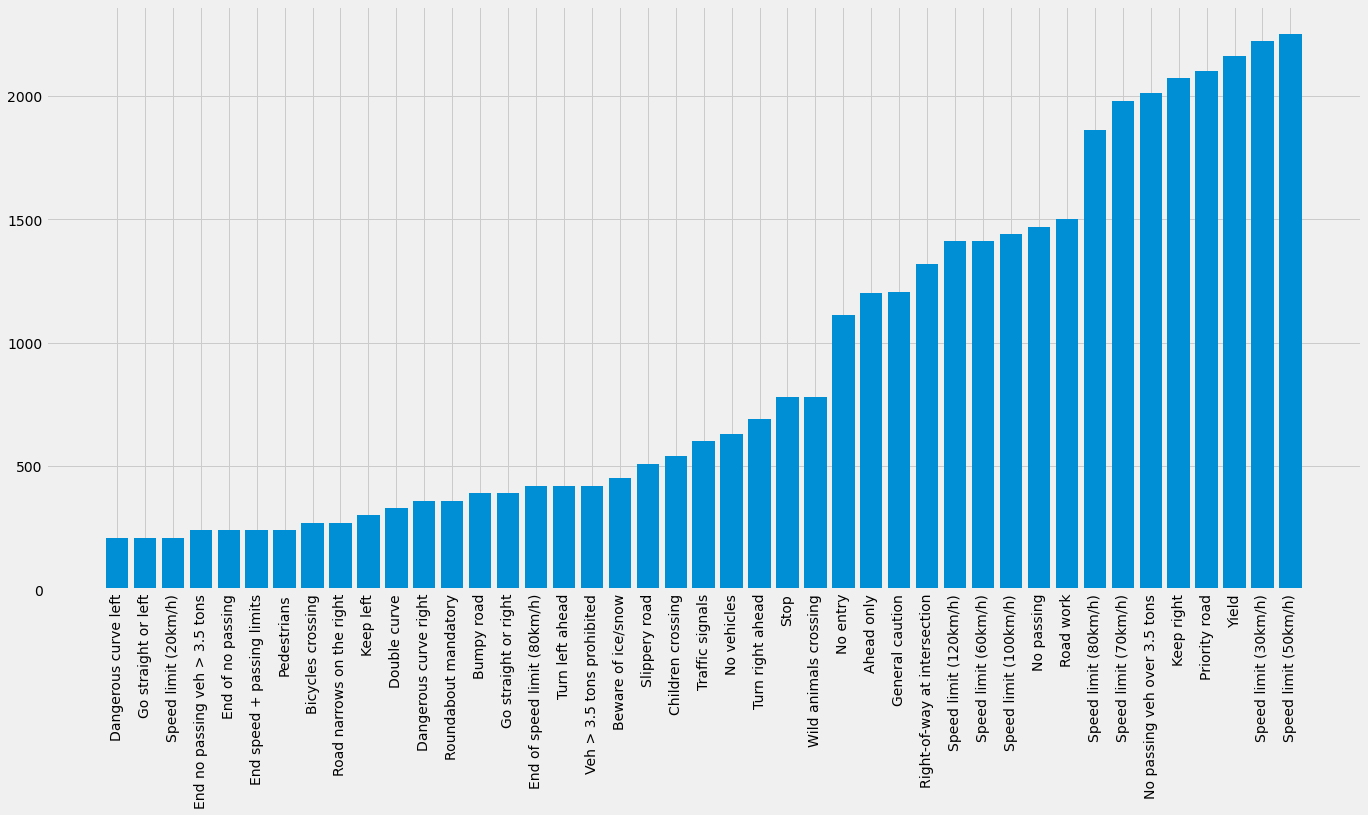

In [7]:
folders = os.listdir(train_path)

train_number = []
class_num = []

for folder in folders:
    train_files = os.listdir(train_path + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(classes[int(folder)])
    
# Sorting the dataset on the basis of number of images in each class
zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_number, class_num = [ list(tuple) for tuple in  tuples]

# Plotting the number of images in each class
plt.figure(figsize=(21,10))  
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.show()

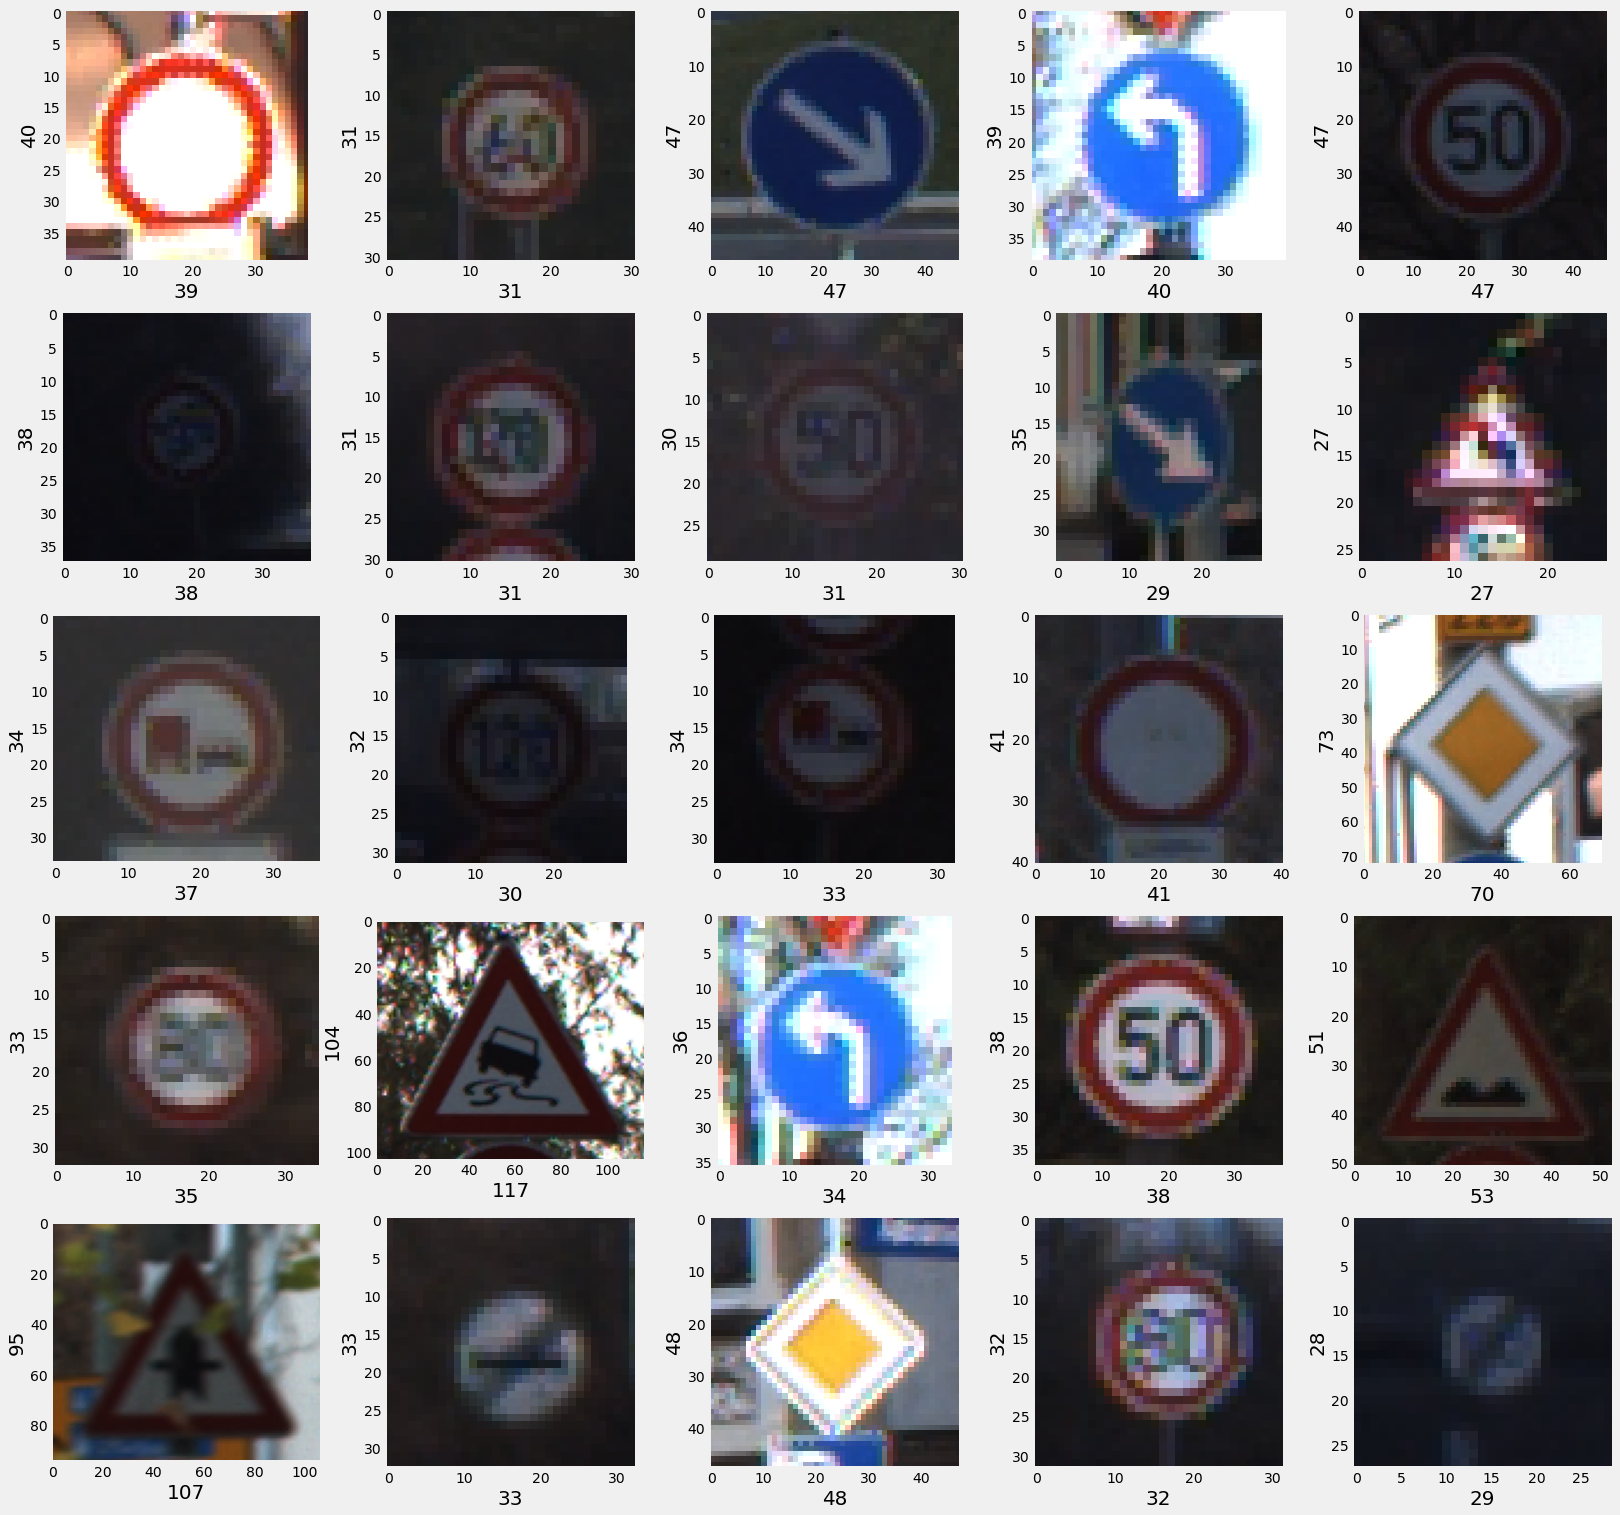

In [8]:
# Visualizing 25 random images from test data
import random
from matplotlib.image import imread

test = pd.read_csv(data_dir + '/Test.csv')
imgs = test["Path"].values

plt.figure(figsize=(25,25))

for i in range(1,26):
    plt.subplot(5,5,i)
    random_img_path = data_dir + '/' + random.choice(imgs)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    plt.grid(b=None)
    plt.xlabel(rand_img.shape[1], fontsize = 20)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 20)#height of image

In [9]:
image_data = []
image_labels = []

for i in range(NUM_CATEGORIES):
    path = data_dir + '/Train/' + str(i)
    images = os.listdir(path)

    for img in images:
        try:
            image = cv2.imread(path + '/' + img)
            image_fromarray = Image.fromarray(image, 'RGB')
            resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
            image_data.append(np.array(resize_image))
            image_labels.append(i)
        except:
            print("Error in " + img)

# Changing the list to numpy array
image_data = np.array(image_data)
image_labels = np.array(image_labels)

print(image_data.shape, image_labels.shape)

(39214, 30, 30, 3) (39214,)


In [10]:
# Shuffling the training data
shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)
image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]

In [11]:
X_train, X_val, y_train, y_val = train_test_split(image_data, image_labels, test_size=0.3, random_state=42, shuffle=True)

X_train = X_train/255 
X_val = X_val/255

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_val.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_val.shape)

X_train.shape (27449, 30, 30, 3)
X_valid.shape (11765, 30, 30, 3)
y_train.shape (27449,)
y_valid.shape (11765,)


In [12]:
# One hot encoding the labels
y_train = keras.utils.to_categorical(y_train, NUM_CATEGORIES)
y_val = keras.utils.to_categorical(y_val, NUM_CATEGORIES)

print(y_train.shape)
print(y_val.shape)

(27449, 43)
(11765, 43)


In [13]:
# Making the model
model = keras.models.Sequential([    
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH,channels)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.5),
    
    keras.layers.Dense(43, activation='softmax')
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [14]:
lr = 0.001
epochs = 5

opt = Adam(lr=lr, decay=lr / (epochs * 0.5))
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [15]:
aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

history = model.fit(aug.flow(X_train, y_train, batch_size=32), epochs=epochs, validation_data=(X_val, y_val))

Epoch 1/5
858/858 [==============================] - 21s 25ms/step - loss: 1.2265 - acc: 0.6695 - val_loss: 0.1094 - val_acc: 0.9651
Epoch 2/5
858/858 [==============================] - 16s 19ms/step - loss: 0.2211 - acc: 0.9339 - val_loss: 0.0347 - val_acc: 0.9904
Epoch 3/5
858/858 [==============================] - 16s 19ms/step - loss: 0.1160 - acc: 0.9660 - val_loss: 0.0308 - val_acc: 0.9902
Epoch 4/5
858/858 [==============================] - 17s 19ms/step - loss: 0.0801 - acc: 0.9761 - val_loss: 0.0156 - val_acc: 0.9946
Epoch 5/5
858/858 [==============================] - 17s 19ms/step - loss: 0.0609 - acc: 0.9817 - val_loss: 0.0187 - val_acc: 0.9946


In [1]:
pip install 'h5py==2.10.0' --force-reinstall

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.9 MB 5.0 MB/s 
     |████████████████████████████████| 15.7 MB 52.6 MB/s 
  Attempting uninstall: six
    Found existing installation: six 1.15.0
    Uninstalling six-1.15.0:
      Successfully uninstalled six-1.15.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires six~=1.15.0, but you have six 1.16.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incomp

In [16]:
model.save("model.h5")
model.save_weights("/content/drive/MyDrive/Traffic_Sign_Classifier/output")
dir(aug)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_keras_api_names',
 '_keras_api_names_v1',
 '_validation_split',
 'apply_transform',
 'brightness_range',
 'channel_axis',
 'channel_shift_range',
 'col_axis',
 'cval',
 'data_format',
 'dtype',
 'featurewise_center',
 'featurewise_std_normalization',
 'fill_mode',
 'fit',
 'flow',
 'flow_from_dataframe',
 'flow_from_directory',
 'get_random_transform',
 'height_shift_range',
 'horizontal_flip',
 'interpolation_order',
 'mean',
 'preprocessing_function',
 'principal_components',
 'random_transform',
 'rescale',
 'rotation_range',
 'row_axis',
 'samplewise_center',
 'samplewise_std_normalization',
 'shear_range',
 'standa

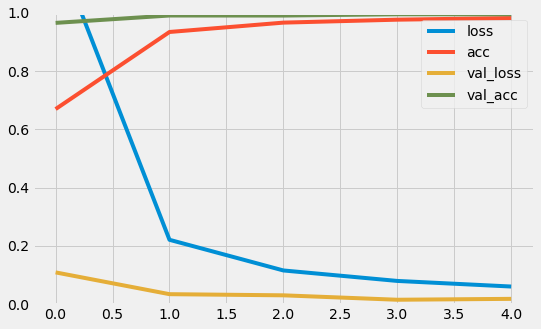

In [17]:
# Evaluating the model
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
# Loading the test data and running the predictions


test = pd.read_csv(data_dir + '/Test.csv')

labels = test["ClassId"].values
imgs = test["Path"].values

data =[]

for img in imgs:
    try:
        image = cv2.imread(data_dir + '/' +img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
        data.append(np.array(resize_image))
    except:
        print("Error in " + img)
X_test = np.array(data)
X_test = X_test/255

pred = model.predict_classes(X_test)

#Accuracy with the test data
print('Test Data accuracy: ',accuracy_score(labels, pred)*100)

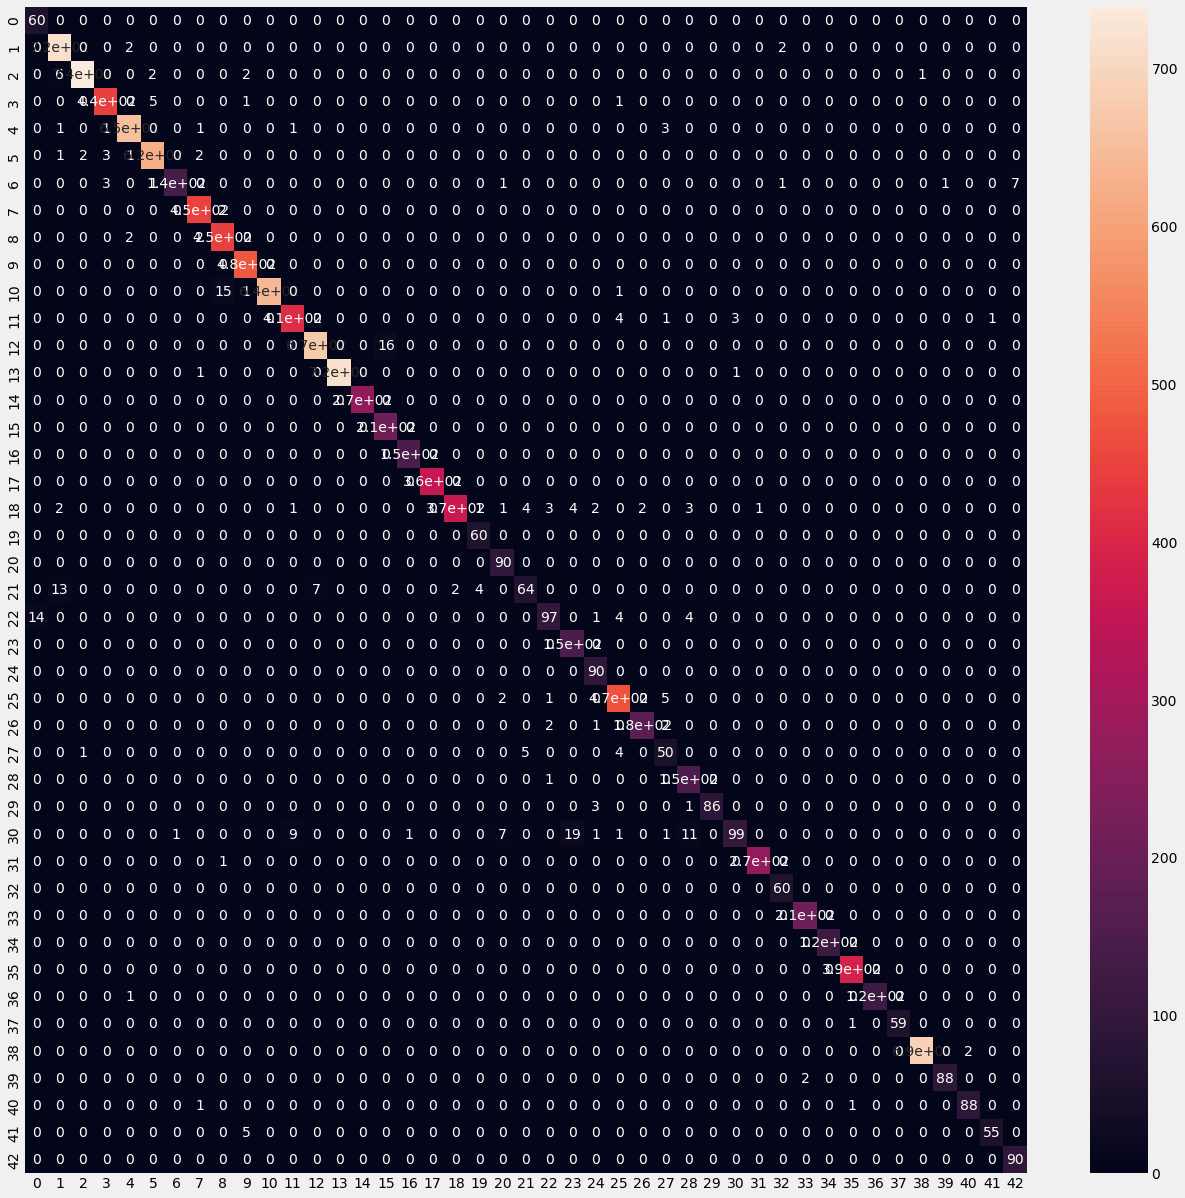

In [ ]:
# Visualizing the confusion matrix

from sklearn.metrics import confusion_matrix
cf = confusion_matrix(labels, pred)
import seaborn as sns

df_cm = pd.DataFrame(cf, index = classes,  columns = classes)
plt.figure(figsize = (20,20))
sns.heatmap(df_cm, annot=True)

In [ ]:
# Classification report


from sklearn.metrics import classification_report

print(classification_report(labels, pred))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90        60
           1       0.97      0.99      0.98       720
           2       1.00      0.99      0.99       750
           3       0.98      0.98      0.98       450
           4       0.99      0.99      0.99       660
           5       0.99      0.99      0.99       630
           6       0.99      0.91      0.95       150
           7       0.98      1.00      0.99       450
           8       0.96      0.99      0.98       450
           9       0.98      1.00      0.99       480
          10       1.00      0.97      0.99       660
          11       0.97      0.98      0.98       420
          12       0.99      0.98      0.98       690
          13       1.00      1.00      1.00       720
          14       1.00      1.00      1.00       270
          15       0.93      1.00      0.96       210
          16       0.99      1.00      1.00       150
          17       1.00    

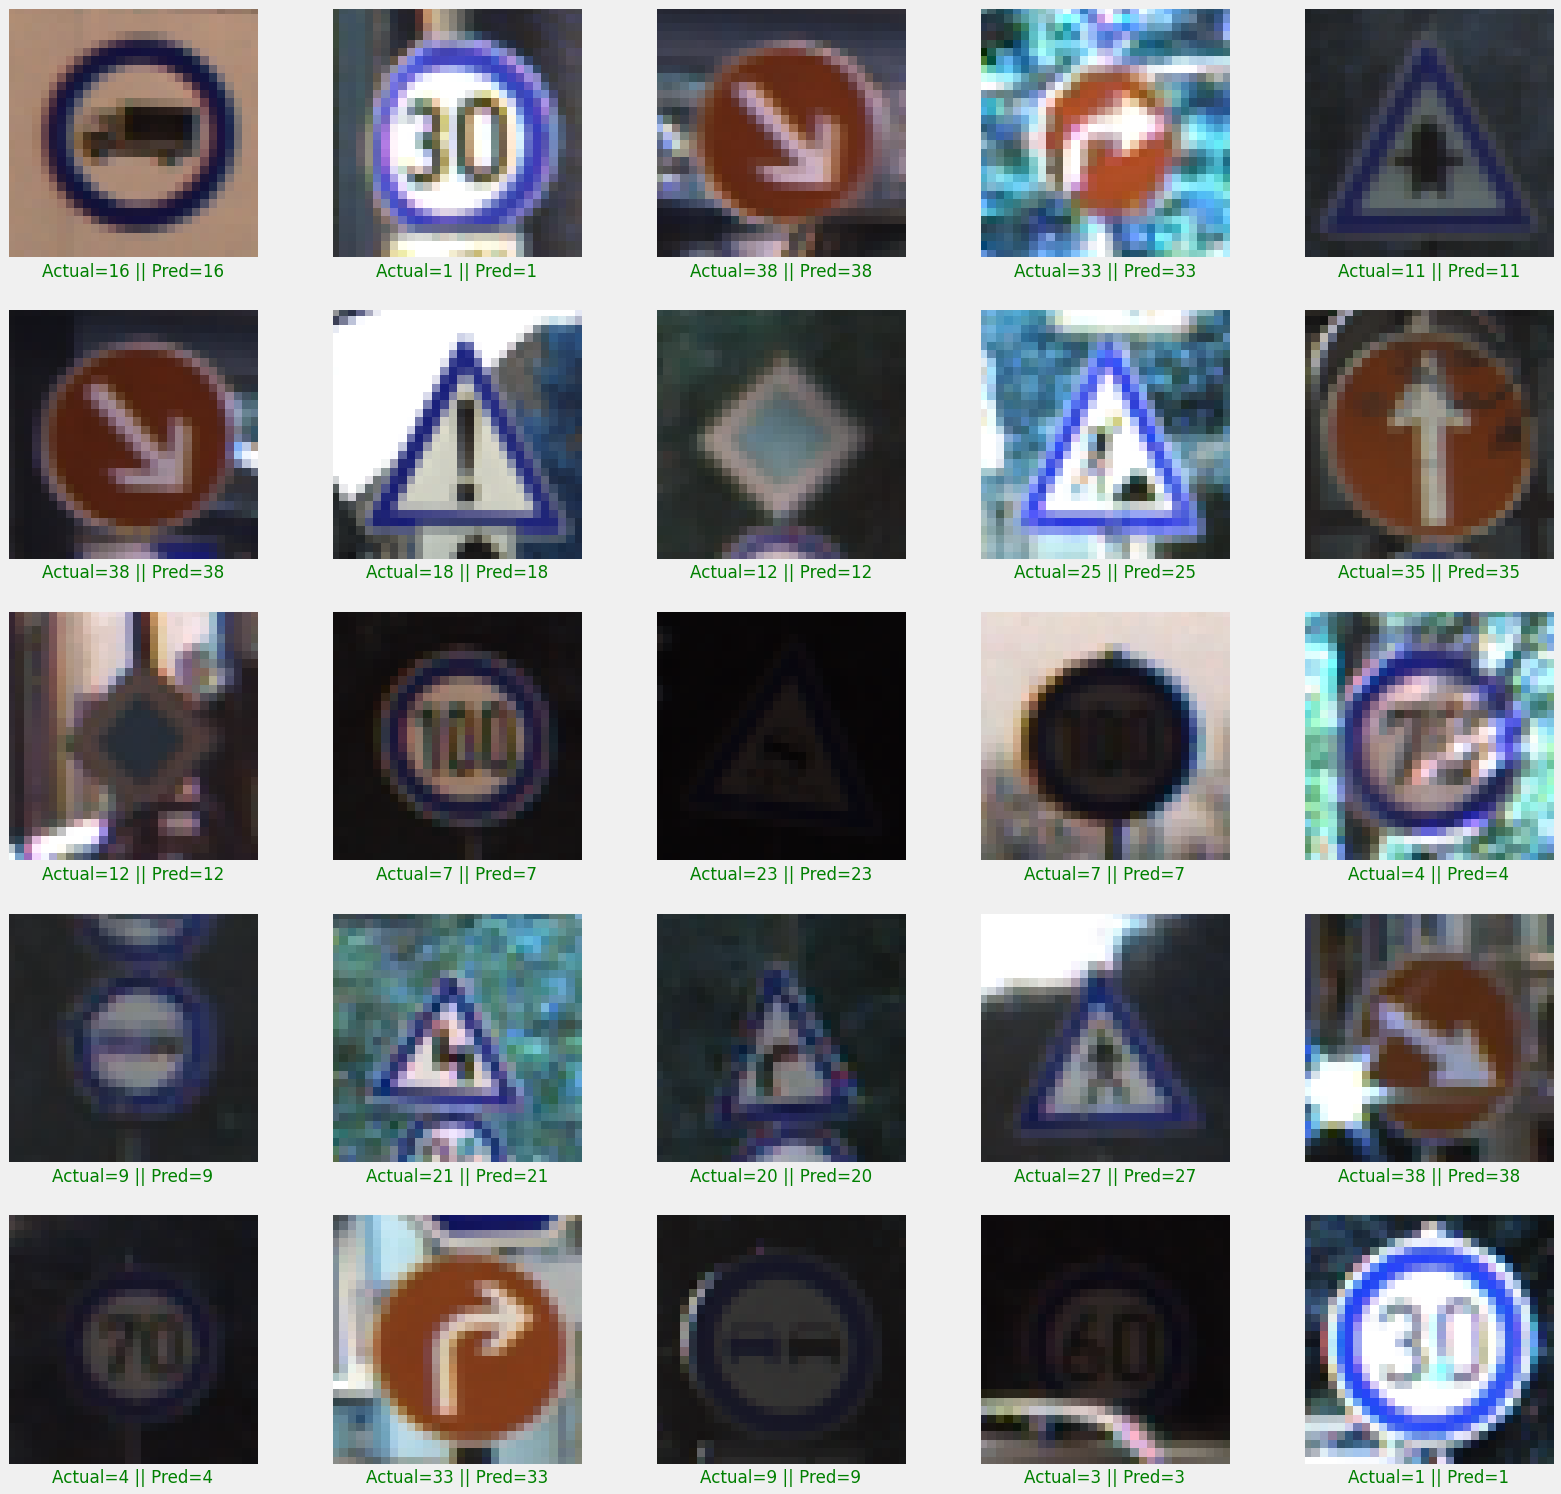

In [ ]:
# Predictions on Test Data


plt.figure(figsize = (25, 25))

start_index = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = pred[start_index + i]
    actual = labels[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    plt.imshow(X_test[start_index + i])
plt.show()

In [ ]:
ls

00_start.ipynb  Meta/     model_trained.p             output.index  Train/
checkpoint      Meta.csv  output.data-00000-of-00002  Test/         Train.csv
labels.csv      model.h5  output.data-00001-of-00002  Test.csv


In [ ]:
from tensorflow import keras

load_model = keras.models.load_model('/content/drive/MyDrive/Traffic_Sign_Classifier/model.h5')





Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [ ]:
frameWidth= 640         # CAMERA RESOLUTION
frameHeight = 480
brightness = 180
threshold = 0.75         # PROBABLITY THRESHOLD
font = cv2.FONT_HERSHEY_SIMPLEX
##############################################
 
# SETUP THE VIDEO CAMERA
cap = cv2.VideoCapture(0)
cap.set(3, frameWidth)
cap.set(4, frameHeight)
cap.set(10, brightness)


def grayscale(img):
  img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  return img
def equalize(img):
  img =cv2.equalizeHist(img)
  return img
def preprocessing(img):
  img = grayscale(img)
  img = equalize(img)
  img = img/255
  return img
def getCalssName(classNo):
  if   classNo == 0: return 'Speed Limit 20 km/h'
  elif classNo == 1: return 'Speed Limit 30 km/h'
  elif classNo == 2: return 'Speed Limit 50 km/h'
  elif classNo == 3: return 'Speed Limit 60 km/h'
  elif classNo == 4: return 'Speed Limit 70 km/h'
  elif classNo == 5: return 'Speed Limit 80 km/h'
  elif classNo == 6: return 'End of Speed Limit 80 km/h'
  elif classNo == 7: return 'Speed Limit 100 km/h'
  elif classNo == 8: return 'Speed Limit 120 km/h'
  elif classNo == 9: return 'No passing'
  elif classNo == 10: return 'No passing for vechiles over 3.5 metric tons'
  elif classNo == 11: return 'Right-of-way at the next intersection'
  elif classNo == 12: return 'Priority road'
  elif classNo == 13: return 'Yield'
  elif classNo == 14: return 'Stop'
  elif classNo == 15: return 'No vechiles'
  elif classNo == 16: return 'Vechiles over 3.5 metric tons prohibited'
  elif classNo == 17: return 'No entry'
  elif classNo == 18: return 'General caution'
  elif classNo == 19: return 'Dangerous curve to the left'
  elif classNo == 20: return 'Dangerous curve to the right'
  elif classNo == 21: return 'Double curve'
  elif classNo == 22: return 'Bumpy road'
  elif classNo == 23: return 'Slippery road'
  elif classNo == 24: return 'Road narrows on the right'
  elif classNo == 25: return 'Road work'
  elif classNo == 26: return 'Traffic signals'
  elif classNo == 27: return 'Pedestrians'
  elif classNo == 28: return 'Children crossing'
  elif classNo == 29: return 'Bicycles crossing'
  elif classNo == 30: return 'Beware of ice/snow'
  elif classNo == 31: return 'Wild animals crossing'
  elif classNo == 32: return 'End of all speed and passing limits'
  elif classNo == 33: return 'Turn right ahead'
  elif classNo == 34: return 'Turn left ahead'
  elif classNo == 35: return 'Ahead only'
  elif classNo == 36: return 'Go straight or right'
  elif classNo == 37: return 'Go straight or left'
  elif classNo == 38: return 'Keep right'
  elif classNo == 39: return 'Keep left'
  elif classNo == 40: return 'Roundabout mandatory'
  elif classNo == 41: return 'End of no passing'
  elif classNo == 42: return 'End of no passing by vechiles over 3.5 metric tons'
  


In [ ]:
success, imgOrignal = cap.read()
 
from tensorflow import keras

load_model=keras.models.load_model("/content/drive/MyDrive/Traffic_Sign_Classifier/model.h5")


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2

imm="/content/drive/MyDrive/Traffic_Sign_Classifier/Test/00050.png"
input_data=[]
try:
            image = cv2.imread(imm)
            image_fromarray = Image.fromarray(image, 'RGB')
            resize_image = image_fromarray.resize((30,30))
            input_data.append(np.array(resize_image))
            
except:
            print("Error in " + img)

input_data=np.array(input_data)/255

pred = load_model.predict(input_data)
result = pred.argmax()
result

25

In [ ]:
while True:
 
# READ IMAGE
  success, imgOrignal = cap.read()
 
# PROCESS IMAGE
  img = np.asarray(imgOrignal)
  img = cv2.resize(img, (32, 32))
  img = preprocessing(img)
  cv2.imshow("Processed Image", img)
  img = img.reshape(1, 32, 32, 1)
  cv2.putText(imgOrignal, "CLASS: " , (20, 35), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
  cv2.putText(imgOrignal, "PROBABILITY: ", (20, 75), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
# PREDICT IMAGE
  predictions = model.predict(img)
  classIndex = model.predict_classes(img)
  probabilityValue =np.amax(predictions)
  if probabilityValue > threshold:
  #print(getCalssName(classIndex))
    cv2.putText(imgOrignal,str(classIndex)+" "+str(getCalssName(classIndex)), (120, 35), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
    cv2.putText(imgOrignal, str(round(probabilityValue*100,2) )+"%", (180, 75), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
    cv2.imshow("Result", imgOrignal)
    
    if cv2.waitKey(1) and 0xFF == ord('q'):
      break

TypeError: ignored

In [ ]:
import cv2 as cv

capture=cv.VideoCapture(0)   # it will open you camera if more cameras then use 1 ,2 3,
# capt=cv.VideoCapture("Videos/dog.mp4")   # it will open the vide0

while True:
    suces, frame=capture.read()  # istrue is than means boolean succesfully run or not 
    cv.imshow("Video",frame)

    if cv.waitKey(10) & 0xFF==ord("d"):     # this basically says if d letter is pressed get out of loop1        
        break


capture.release()   #this is releasing the capt
cv.destroyAllWindows()   # this means distroy the window bcz we don't want it


DisabledFunctionError: ignored